<a href="https://colab.research.google.com/github/sanu1230/Academic-Project/blob/master/Stacked_Model_Loan_Payment_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacked Model - Loan Payment Data

**Attributes**

•	Loan_id : A unique loan number assigned to each loan customers.

•	Loan_status: Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

•	Principal: Basic principal loan amount at the origination terms, could be weekly (7 days), biweekly, and monthly payoff schedule

•	effective_date: When the loan got originated and took effects

•	due_date: Since it’s one-time payoff schedule, each loan has one single due date

•	paidoff_time: The actual time a customer pays off the loan

•	pastdue_days: How many days a loan has been past due

•	age, education, Gender: A customer’s basic demographic information


**Challange**

- We would like to perform classification on Loan_status variable that contains three categories namely PAIDOFF, COLLETION AND COLLECTION_PAIDOFF. 

- The PAIDOFF category is all about loan paid off by the customers. The COLLECTION is all about the loan is yet to be paid off so bank is collecting money from those customers who seem to be unwilling to repay the loan amount; these customers are apprehended to be defaulters.

- The next and last category is COLLECTION_PAIDOFF that states that the loan amount was repaid by the customers after conducting Collection drive. 

- The objective is to Classify customers into any of the given categories.

- This analysis will generate valuable insights for banks to consider which customers they will provide loan to.


#Business Problem
To identify which loan account to which loan status category (Paid_off, Collection_Paidoff, still in collection)

In [ ]:
!pip -q install pandas_profiling==2.5.0

     |████████████████████████████████| 194kB 2.9MB/s 
     |████████████████████████████████| 10.4MB 8.3MB/s 
     |████████████████████████████████| 133kB 40.2MB/s 
     |████████████████████████████████| 614kB 49.6MB/s 
     |████████████████████████████████| 1.5MB 52.7MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 256kB 38.1MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 327kB 51.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 215kB 51.4MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 747kB 53.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.22.0 

In [ ]:
!pip freeze | grep pandas

pandas==0.25.3
pandas-datareader==0.8.1
pandas-gbq==0.11.0
pandas-profiling==2.5.0
sklearn-pandas==1.8.0


In [ ]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import dask.dataframe as dd
import pandas_profiling
from IPython.display import HTML, display, IFrame


In [ ]:
# Installing necessary packages
!pip -q install imgaug==0.2.5
!pip -q install shap
!pip -q install lime
!pip -q install eli5

In [ ]:
#Loading data from google drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Loading Data

###Reading Data with Pandas

In [ ]:
%time

start_t = time.time()
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan Payment/Loan Payment/Loan payments data.csv')
stop_t = time.time()
print('Pandas has read the file in {}s'.format(start_t-stop_t))
df.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Pandas has read the file in -0.6494371891021729s


Loan_ID loan_status  Principal  ...  age             education  Gender
0  xqd20166231     PAIDOFF       1000  ...   45  High School or Below    male
1  xqd20168902     PAIDOFF       1000  ...   50              Bechalor  female
2  xqd20160003     PAIDOFF       1000  ...   33              Bechalor  female
3  xqd20160004     PAIDOFF       1000  ...   27               college    male
4  xqd20160005     PAIDOFF       1000  ...   28               college  female

[5 rows x 11 columns]

###Reading Data with Dask

In [ ]:
%time

start_t = time.time()
ddf = dd.read_csv('/content/drive/My Drive/Colab Notebooks/Loan Payment/Loan Payment/Loan payments data.csv')
stop_t = time.time()
print('Dask has read the file in {}s'.format(start_t-stop_t))
ddf.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
Dask has read the file in -0.02149176597595215s


Loan_ID loan_status  Principal  ...  age             education  Gender
0  xqd20166231     PAIDOFF       1000  ...   45  High School or Below    male
1  xqd20168902     PAIDOFF       1000  ...   50              Bechalor  female
2  xqd20160003     PAIDOFF       1000  ...   33              Bechalor  female
3  xqd20160004     PAIDOFF       1000  ...   27               college    male
4  xqd20160005     PAIDOFF       1000  ...   28               college  female

[5 rows x 11 columns]

In [ ]:
# As Obviously dask reads faster than pandas, however lets continue with pandas

In [ ]:
# Total Rows and columns in the dataframe
df.shape

(500, 11)

# Exploratory Data Analysis

##Data Understanding

In [ ]:
df.describe()

Principal       terms  past_due_days         age
count   500.000000  500.000000      200.00000  500.000000
mean    943.200000   22.824000       36.01000   31.116000
std     115.240274    8.000064       29.38088    6.084784
min     300.000000    7.000000        1.00000   18.000000
25%    1000.000000   15.000000        3.00000   27.000000
50%    1000.000000   30.000000       37.00000   30.000000
75%    1000.000000   30.000000       60.00000   35.000000
max    1000.000000   30.000000       76.00000   51.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


**Observsion:**  From above info, we see that 
  - feature 'loan status' &'gender' data tpye is object and needs to be changed to categorical
  - 'effective_date', 'due_date' & 'paid_off_time' are dates hence needs to be changed to datatime data type.
  - paid_off_time & past_due_days has missing values.

##Data Cleaning

In [ ]:
# before we change the data type, lets replace all null values to zeros
df = df.fillna(0)

#Note: 
#'past_due_days' has NaN values for those loan accounts where the loan is paid in full, so no more days remaining or due,
# hence the values can't be replaced with mean or mode nor it can be dropped, hence filling it with zero.

#'paid_off_time' has NaN values for those loan accounts where the loan is not yet paid, hence there cant be any paid off date/time
# neither the NaN can be replaced with any other value then zero.  

In [ ]:
# Converting the above features to its correct data type:

df['loan_status'] = df['loan_status'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['education'] = df['education'].astype('category')

df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])

# past_due days data type is float, however number of days past always a whole number hence, need to change into integer
df['past_due_days'] = df['past_due_days'].astype('int')

df.head()


Loan_ID loan_status  Principal  ...  age             education  Gender
0  xqd20166231     PAIDOFF       1000  ...   45  High School or Below    male
1  xqd20168902     PAIDOFF       1000  ...   50              Bechalor  female
2  xqd20160003     PAIDOFF       1000  ...   33              Bechalor  female
3  xqd20160004     PAIDOFF       1000  ...   27               college    male
4  xqd20160005     PAIDOFF       1000  ...   28               college  female

[5 rows x 11 columns]

In [ ]:
df.info() #No missing values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null category
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
paid_off_time     500 non-null datetime64[ns]
past_due_days     500 non-null int64
age               500 non-null int64
education         500 non-null category
Gender            500 non-null category
dtypes: category(3), datetime64[ns](3), int64(4), object(1)
memory usage: 33.2+ KB


##Data Profiling

In [ ]:
report = pandas_profiling.ProfileReport(df)
report.to_file('loan_payment.html')

In [ ]:
display(HTML(open('/content/loan_payment.html').read()))

**Observation:**
- 'loan_status', 'terms', 'education', data is imbalanced
- 'principle', 'past_due_days', has high kurtosis and skewness

- As per the data above we understand that:     
    -- all those customers who have paid the loan on or before due date or after due date, does not have any past_due_days remaining, since the loan is paid off.

    -- all those who have not paid the loan and are in collection, does not have any paid_off_time, cause the loan is not paid yet and is in collection

#Data Visualization

##Plotly Express Scatter Plot Visualization

In [ ]:
#Lets plot a scatter plot to see number of defauters based on loan effective_date and past_due_days

fig = px.scatter(df, x='effective_date', y='past_due_days', color='loan_status')
fig.show()

**Observation:** From above scatter plot we see that, maximum defaulter are from the loan issued/effective date Sep 11 & Sep 12

##Plotly Express Bar Plot Visualization

In [ ]:
#Lets create a Bar plot to see number of defauters based on their 'education'

fig = px.bar(df, x='education',  color='loan_status')
fig.show()

**Observation:** The bar plot shows that, most of the defaulters have done either highSchool or below or some level of college. There are very few defaulter from Bechalor section and almost null from Master or Above section of eduction

##Seaborn Violinplot Visualization

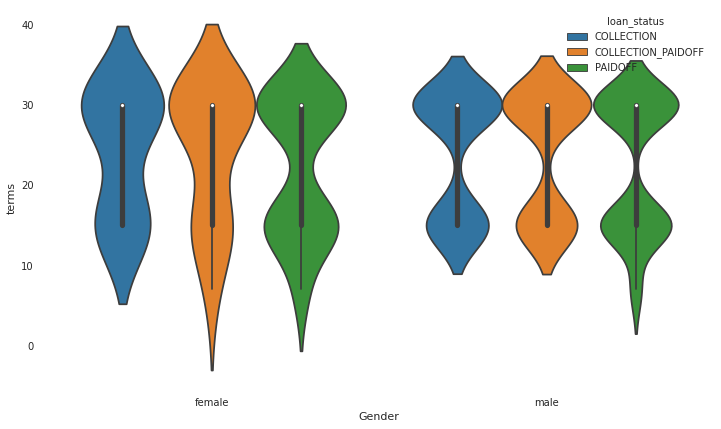

In [ ]:
#Lets find which gender has defaulted most, by comparing features 'Gender' and 'term'

plt.figure(figsize=(12, 7))
sns.violinplot(x='Gender', y='terms', data=df, hue='loan_status')


**Observation:** 
- From the above violinplot we see that, there are more female defaulters compared to male defaulters.

##Plotly Express Bar plot Visualization

In [ ]:
#Lets find maximum defaulters are from which selected 'terms'
px.bar(df, x='terms', color='loan_status')

**Observation:** From the above graph we see that, 
- very few customers have selected 7 days term and for almost everyone paid-off.
- Maximum number of customers have selected 15 & 30 days term and hence we can see maximum defaulters from the same terms.
- also we see that from defaulter, more then around 70% have paid on time and around 15% have now paid as collection paidoff

##Seaborn scatterplot Visualization

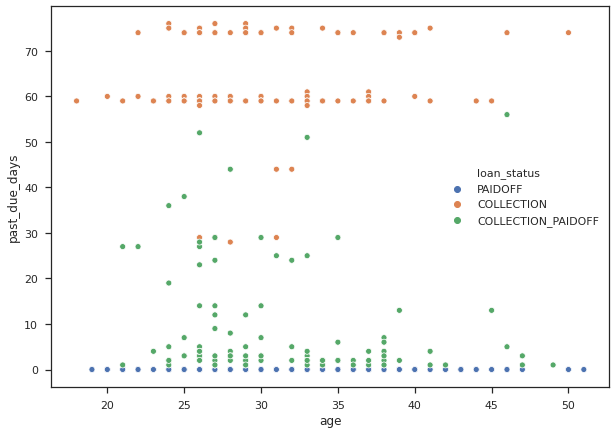

In [ ]:
#Lets check which age-group has more defaulters

plt.figure(figsize=(10, 7))
sns.set(style='ticks')
sns.scatterplot(data=df, x='age', y='past_due_days', hue='loan_status')

**Observation:**  We see maximum number of defaulters are from the age group 24 to 40 yrs

In [ ]:
df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

##Plotly Express Pie plot Visualization

In [ ]:
#Lets find how much principal amount is yet to be collected how much was collected by collection dept and how much was paid on time by customers.

fig = px.pie(df, values='Principal', names='loan_status', title='Total Principal amount distribution')
fig.show()

**Observation:** From the above Pie Chart we see that, around 20% of principal amount is yet to be collected, and around 20% of principal has been collected. We also see that around 60% principal amount has been paid on time by customers

In [ ]:
#Creating a copy of data for future reference 
df1 = df.copy()

#Feature Engineering

### Handling Categorical Values One-Hot-Encoding

In [ ]:
#Lets one hot encode X categorical features
cat_cols = ['education', 'Gender']
encoded_cols = pd.get_dummies(df[cat_cols], drop_first=True)
encoded_cols.shape

(500, 4)

In [ ]:
#lets concat the encoded data with df dataframe

df = pd.concat([df, encoded_cols], axis=1)
df.shape


(500, 15)

In [ ]:
# converting dates to numerical
import datetime as dt

df['due_date'] = df['due_date'].map(dt.datetime.toordinal)
df['effective_date'] = df['effective_date'].map(dt.datetime.toordinal)
df['paid_off_time'] = df['paid_off_time'].map(dt.datetime.toordinal)

In [ ]:
df.head()

Loan_ID loan_status  ...  education_college  Gender_male
0  xqd20166231     PAIDOFF  ...                  0            1
1  xqd20168902     PAIDOFF  ...                  0            0
2  xqd20160003     PAIDOFF  ...                  0            0
3  xqd20160004     PAIDOFF  ...                  1            1
4  xqd20160005     PAIDOFF  ...                  1            0

[5 rows x 15 columns]

In [ ]:
col_names = df.columns
col_names

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender', 'education_High School or Below', 'education_Master or Above',
       'education_college', 'Gender_male'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
Loan_ID                           500 non-null object
loan_status                       500 non-null category
Principal                         500 non-null int64
terms                             500 non-null int64
effective_date                    500 non-null int64
due_date                          500 non-null int64
paid_off_time                     500 non-null int64
past_due_days                     500 non-null int64
age                               500 non-null int64
education                         500 non-null category
Gender                            500 non-null category
education_High School or Below    500 non-null uint8
education_Master or Above         500 non-null uint8
education_college                 500 non-null uint8
Gender_male                       500 non-null uint8
dtypes: category(3), int64(7), object(1), uint8(4)
memory usage: 35.2+ KB


### Label encoding the target

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['loan_status_cat'] = le.fit_transform(df['loan_status'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
Loan_ID                           500 non-null object
loan_status                       500 non-null category
Principal                         500 non-null int64
terms                             500 non-null int64
effective_date                    500 non-null int64
due_date                          500 non-null int64
paid_off_time                     500 non-null int64
past_due_days                     500 non-null int64
age                               500 non-null int64
education                         500 non-null category
Gender                            500 non-null category
education_High School or Below    500 non-null uint8
education_Master or Above         500 non-null uint8
education_college                 500 non-null uint8
Gender_male                       500 non-null uint8
loan_status_cat                   500 non-null int64
dtypes: category(3), int64(8), object

#Data Splitting & Standardization

In [ ]:
df2 = df.copy()

In [ ]:
#Lets drop categorical cols and umimportant colums as we have concat the encoded cols

X = df.drop(['loan_status', 'loan_status_cat', 'education', 'Gender', 'Loan_ID'], axis=1)

y = df['loan_status_cat']

#Lets Use Sandardscaler to normalise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Scale and center the data
X_normalized = scaler.transform(X)

# Create a pandas DataFrame
X = pd.DataFrame(data=X_normalized, index=X.index, columns=X.columns)

In [ ]:
X.head()

Principal     terms  ...  education_college  Gender_male
0   0.493377  0.897891  ...          -0.886405     0.426653
1   0.493377  0.897891  ...          -0.886405    -2.343823
2   0.493377  0.897891  ...          -0.886405    -2.343823
3   0.493377 -0.978972  ...           1.128152     0.426653
4   0.493377  0.897891  ...           1.128152    -2.343823

[5 rows x 11 columns]


#Feature Importance

##Important Features

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Principal                         500 non-null float64
terms                             500 non-null float64
effective_date                    500 non-null float64
due_date                          500 non-null float64
paid_off_time                     500 non-null float64
past_due_days                     500 non-null float64
age                               500 non-null float64
education_High School or Below    500 non-null float64
education_Master or Above         500 non-null float64
education_college                 500 non-null float64
Gender_male                       500 non-null float64
dtypes: float64(11)
memory usage: 43.1 KB


[5.22454056e-03 9.22743491e-03 2.95311719e-02 2.31582206e-02
 3.88996744e-01 5.11586243e-01 1.83730106e-02 4.44394457e-03
 2.32133903e-04 4.30170437e-03 4.92485201e-03]


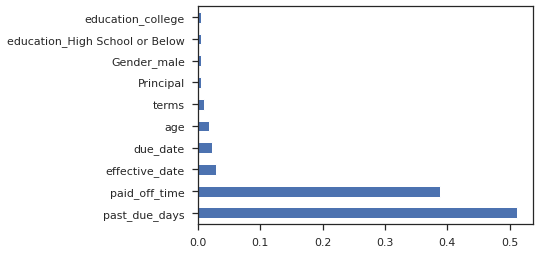

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #using inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
X.columns

Index(['Principal', 'terms', 'effective_date', 'due_date', 'paid_off_time',
       'past_due_days', 'age', 'education_High School or Below',
       'education_Master or Above', 'education_college', 'Gender_male'],
      dtype='object')

##Splitting into train and test and sampling with stratify

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def model_train(model, name):
    model.fit(X_train, y_train)                                               # Fitting the model
    y_pred = model.predict(X_test)                                            # Making prediction from the trained model
    print(name + " Report")
    print('')
    cm = confusion_matrix(y_test, y_pred)
    print(name +" Confusion Matrix " +"Report")
    print('')                     # Displaying the Confusion Matrix
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Report")
    print('')
    print(cr)                                                                 # Displaying the Classification Report
    print('------------------------')

#Model Building

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model_train(lr, "Logistic Regression")

Logistic Regression Report

Logistic Regression Confusion Matrix Report

[[20  0  0]
 [ 0  6 14]
 [ 0  0 60]]
-----------------------
Logistic Regression Classification Report  Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.30      0.46        20
           2       0.81      1.00      0.90        60

    accuracy                           0.86       100
   macro avg       0.94      0.77      0.79       100
weighted avg       0.89      0.86      0.83       100

------------------------


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3)

model_train(dt, "Decision Tree Classifier")

Decision Tree Classifier Report

Decision Tree Classifier Confusion Matrix Report

[[20  0  0]
 [ 0 20  0]
 [ 0  0 60]]
-----------------------
Decision Tree Classifier Classification Report  Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        60

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

------------------------


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, criterion='gini', max_depth = 250, min_samples_split=3, random_state=55)

model_train(rf, "Random Forest Classifier")

Random Forest Classifier Report

Random Forest Classifier Confusion Matrix Report

[[20  0  0]
 [ 0 20  0]
 [ 0  0 60]]
-----------------------
Random Forest Classifier Classification Report  Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        60

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

------------------------


##Grid SearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

random_grid = {'n_estimators': range(5,50,5),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [10,20,30,40],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]
               }

rf = RandomForestClassifier()

rf_gs = GridSearchCV(rf, random_grid, cv = 3, n_jobs=-1, verbose=2)

rf_gs.fit(X_train, y_train)
y_pred = rf_gs.predict(X_test)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 1264 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  1.1min finished


In [ ]:
rf_gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print("Grid Search CV")
print('')
cm = confusion_matrix(y_test, y_pred)                               
print("Grid Search CV Confusion Matrix ")                # Displaying the Confusion Matrix
print(cm)
print('-----------------------')
print('')
cr = classification_report(y_test, y_pred)
print("Grid Search Classification Report ")           # Displaying the Classification Report
print(cr)
print('------------------------')

Grid Search CV

Grid Search CV Confusion Matrix 
[[20  0  0]
 [ 0 20  0]
 [ 0  0 60]]
-----------------------

Grid Search Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        60

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

------------------------


## Randomized Grid Search

In [ ]:
  from sklearn.model_selection import RandomizedSearchCV

  rf = RandomForestClassifier()

  rf_random = RandomizedSearchCV(rf, random_grid, cv = 3, n_jobs=-1, verbose=2)

  rf_random.fit(X_train, y_train)
  y_pred = rf_random.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


In [ ]:
print("Randomized Grid Search Validation Data")
cm = confusion_matrix(y_test, y_pred)                               
print("Randomized Grid Search Confusion Matrix " +" Validation Data")                # Displaying the Confusion Matrix
print(cm)
print('-----------------------')
cr = classification_report(y_test, y_pred)
print("Randomized Grid Search Classification Report " +" Validation Data")           # Displaying the Classification Report
print(cr)
print('------------------------')

Randomized Grid Search Validation Data
Randomized Grid Search Confusion Matrix  Validation Data
[[20  0  0]
 [ 0 20  0]
 [ 0  0 60]]
-----------------------
Randomized Grid Search Classification Report  Validation Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        60

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

------------------------


##SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

model_train(svm, 'SVM')

SVM Report

SVM Confusion Matrix Report

[[20  0  0]
 [ 0  6 14]
 [ 0  0 60]]
-----------------------
SVM Classification Report  Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.30      0.46        20
           2       0.81      1.00      0.90        60

    accuracy                           0.86       100
   macro avg       0.94      0.77      0.79       100
weighted avg       0.89      0.86      0.83       100

------------------------


#Building Stacked Model

###Creating definations to genralize the stacked model


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

# getting a stacking ensemble of models
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', DecisionTreeClassifier()))
  level0.append(('rf', RandomForestClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  # defining meta learner model
  level1 = LogisticRegression()
  # defining the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

# Making a list of models to evaluate
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = DecisionTreeClassifier()
  models['rf'] = RandomForestClassifier()
  models['svm'] = SVC()
  models['Gauss'] = GaussianNB()
  models['Stacking'] = get_stacking()
  return models

# evaluate the model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

###Evaluating all Models

In [ ]:
# getting the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
  scores = evaluate_model(model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>lr 0.875 (0.033)
>knn 0.806 (0.036)
>dt 1.000 (0.000)
>rf 1.000 (0.000)
>svm 0.838 (0.031)
>Gauss 0.855 (0.063)
>Stacking 0.998 (0.006)


**Observation:** 
- Runnnig the above stacked model, first reports the performance of each base model, and then the stacking ensemble model
- In this case, we can see that the Decision Tree, Random Forest & stacking ensemble appears to perform better than any other model on a average, achieving an accuracy of about 100 percent 



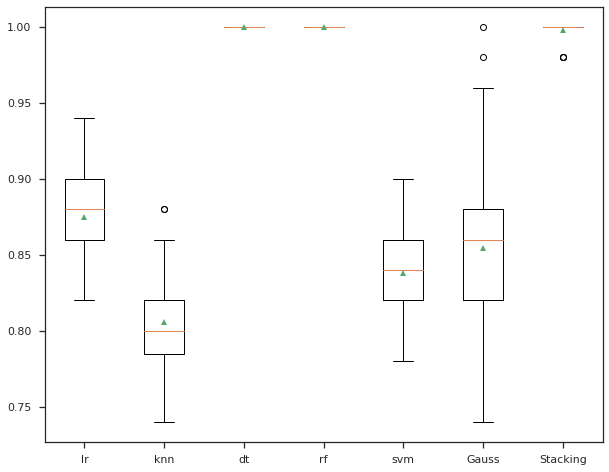

In [ ]:
# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Observation:**
- Here, we can see that the mean and median accuracy for the stacking model sits slightly higher than the Lr model.

- We choose a stacking ensemble as our final model, we can fit and use it to make predictions on new data just like any other model.





#Model Explaination

##Permutation Importance
Running Permutation importance using Decision Tree Classifier

###ELI5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
stacking = get_stacking()
stacking_model = stacking.fit(X_train, y_train)
perm = PermutationImportance(stacking_model, random_state=101).fit(X_test, y_test)      # Evaluate the permutation importance 
eli5.show_weights(perm, feature_names = X_test.columns.values)                    # Display the weights of each features


Using TensorFlow backend.


**Conclusion**: The columns in the green are the most important features.

###SHAP

Let's see how the columns impact a single record of data

In [ ]:
dt_model= dt.fit(X_train, y_train)

row_to_show = 50                # The row for which we want to check the SHAP explanations
data_to_predict = X_test.iloc[row_to_show]
#data_to_predict

data_to_preddict_array = data_to_predict.values.reshape(1,-1)
dt_model.predict_proba(data_to_preddict_array)    # Prediction probability on the row of the data

dt_model.predict(data_to_preddict_array)         # Predicted output

array([2])

In [ ]:
y_test.iloc[row_to_show]

2

Prediction is correct

In [ ]:
import shap

# Object that can calculate Shap values
explainer = shap.TreeExplainer(dt_model, X_test)        # SHAP Tree Explainer

# Calculate the shap values
shap_values = explainer.shap_values(data_to_predict)      # SHAP explanations

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_to_predict)

###LIME

In [ ]:
import lime
import lime.lime_tabular



explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns.values.tolist(),
                                                   mode='regression', class_names='loan_status_cat')


In [ ]:
lime_exp=explainer.explain_instance(X_test.iloc[10], dt.predict_proba, num_features=X_test.shape[1], top_labels = 1)
lime_exp.show_in_notebook(show_table=True, show_all=False)